# Estadistica descriptiva


In [1]:
import pandas as pd
import numpy as np

# Set to see all columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file = 'data/01_bronze/2018.csv'
df = pd.read_csv(csv_file)
df.shape

(7213446, 28)

# EDA

In [3]:
# Visualizamos informacion de la columna DEP_DELAY
df.DEP_DELAY.info()

# Contamos la cantidad de valores nulos
df.DEP_DELAY.isna().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 7213446 entries, 0 to 7213445
Series name: DEP_DELAY
Non-Null Count    Dtype  
--------------    -----  
7096212 non-null  float64
dtypes: float64(1)
memory usage: 55.0 MB


117234

In [4]:
# Nos quedamos con los DEP_DELAY que tienen datos
df = df[df['DEP_DELAY'].notna()]
df.shape

(7096212, 28)

In [24]:
# Check unique values in OP_CARRIER (airline) column
df.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [10]:
# Renaming airline codes to company names
# Source: https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States

df['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
},inplace=True)

In [20]:
# Departure delay data (in minutes)
df.DEP_DELAY.head()

0    -5.0
1    -8.0
2    -5.0
3     6.0
4    20.0
Name: DEP_DELAY, dtype: float64

In [52]:
# total de registros
total = int(df.shape[0])
total_delay = int(df[(df.DEP_DELAY > 0) | (df.ARR_DELAY > 0)].FL_DATE.count())

# only departure delayed
dep_delay_only = int(df[(df.DEP_DELAY > 0) & (df.ARR_DELAY <= 0)].FL_DATE.count())

# only arribal delayed
arr_delay_only = int(df[(df.DEP_DELAY <= 0) & (df.ARR_DELAY > 0)].FL_DATE.count())

# departure and arribal delayed
dep_arr_delay = int(df[(df.DEP_DELAY > 0) & (df.ARR_DELAY > 0)].FL_DATE.count())

dep_delay = (dep_delay_only/total_delay) * 100
arr_delay = (arr_delay_only/total_delay) * 100
all_delay = (dep_arr_delay/total_delay) * 100

print(f"% Departure delay only: {dep_delay}")
print(f"% Arrival delay only: {arr_delay}")
print(f"% Departure & Arrival (all) delayed: {all_delay}")


% Departure delay only: 20.60811129228362
% Arrival delay only: 23.052463579612752
% Departure & Arrival (all) delayed: 55.95717207513737


In [5]:
# Si queremos trabajar solo con valores positivos de DEP_DELAY
#df_dep_delay = df[df['DEP_DELAY']>0]

# Seguimos con el mismo dataset obtenido hasta ahora. Hacemos una copia
df_dep_delay = df.copy()
df_dep_delay.shape

(7096212, 28)

In [6]:
# Calculamos promedio de demora de partida por origen y dia (opcion 2)
df_mean_dep_delay = df_dep_delay.groupby(["ORIGIN", "FL_DATE"])\
    .agg(MEAN_DEP_DELAY=('DEP_DELAY', 'mean'))\
    .reset_index()

df_mean_dep_delay

,ORIGIN,FL_DATE,MEAN_DEP_DELAY
0,ABE,2018-01-01,7.833333
1,ABE,2018-01-02,77.375000
2,ABE,2018-01-03,51.333333
3,ABE,2018-01-04,30.125000
4,ABE,2018-01-05,17.375000
...,...,...,...
121460,YUM,2018-12-27,4.250000
121461,YUM,2018-12-28,2.250000
121462,YUM,2018-12-29,3.500000
121463,YUM,2018-12-30,3.750000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# runtime configuration (rc) containing the default styles for every plot element
plt.rcParams['figure.figsize']=(16,6) 

## Analizamos el ORIGIN = JFK

In [8]:
data = df_mean_dep_delay[df_mean_dep_delay['ORIGIN']=='JFK']

# Metodo mas rebuscado pero se muestra como alternativa
# En la nueva columna 'select', marcamos con -1 los registros que no son 'JFK'
#df_mean_dep_delay['select'] = df_mean_dep_delay['ORIGIN'].apply(lambda x: x.find('JFK'))
#data = df_mean_dep_delay[df_mean_dep_delay['select'] != -1].drop('select', axis=1)

data

,ORIGIN,FL_DATE,MEAN_DEP_DELAY
59906,JFK,2018-01-01,18.311475
59907,JFK,2018-01-02,18.047478
59908,JFK,2018-01-03,10.893548
59909,JFK,2018-01-04,71.066667
59910,JFK,2018-01-05,154.356164
...,...,...,...
60266,JFK,2018-12-27,4.470430
60267,JFK,2018-12-28,29.405914
60268,JFK,2018-12-29,13.348571
60269,JFK,2018-12-30,8.064171


array([[<AxesSubplot:title={'center':'MEAN_DEP_DELAY'}>]], dtype=object)

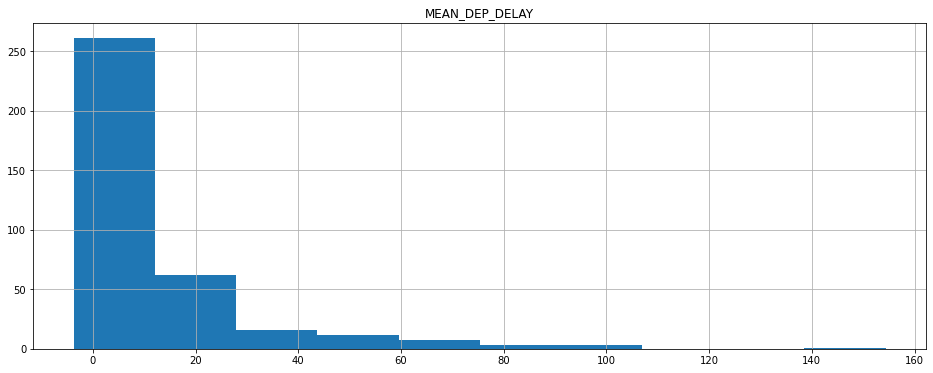

In [9]:
# Histograma de la variable MEAN_DEP_DELAY
data.hist()

<AxesSubplot:xlabel='FL_DATE'>

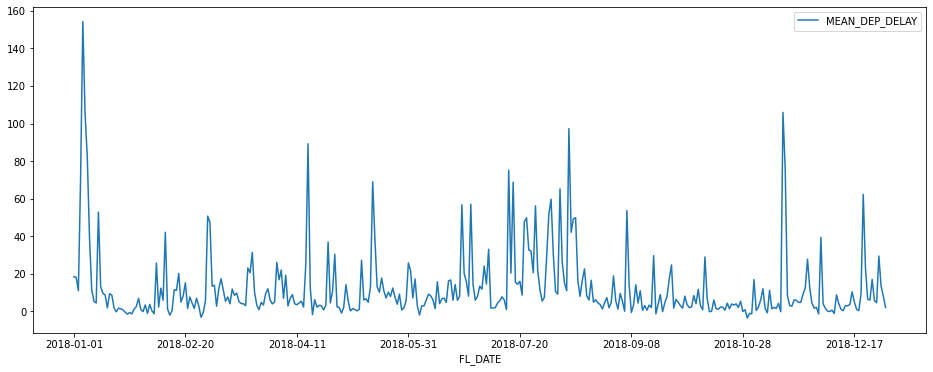

In [10]:
data.plot(x='FL_DATE', y='MEAN_DEP_DELAY')

In [11]:
data2 = data[data['ORIGIN']=='JFK']
data2.drop(['ORIGIN'], axis=1, inplace=True)
data2.set_index('FL_DATE', inplace=True)

data2

,MEAN_DEP_DELAY
FL_DATE,
2018-01-01,18.311475
2018-01-02,18.047478
2018-01-03,10.893548
2018-01-04,71.066667
2018-01-05,154.356164
...,...
2018-12-27,4.470430
2018-12-28,29.405914
2018-12-29,13.348571


In [13]:
# Desviación standard
data.std()

MEAN_DEP_DELAY    18.998573
dtype: float64

In [14]:
# Ventana temporal para el promedio y multiplo de sigma para definir upper and lower bounds
wind = 7
sigma = 2

data['lower_bound'] = data['MEAN_DEP_DELAY'].rolling(window=wind)\
    .mean() - (sigma * data['MEAN_DEP_DELAY'].rolling(window=wind).std())

data['upper_bound'] = data['MEAN_DEP_DELAY'].rolling(window=wind)\
    .mean() + (sigma * data['MEAN_DEP_DELAY'].rolling(window=wind).std())


<AxesSubplot:>

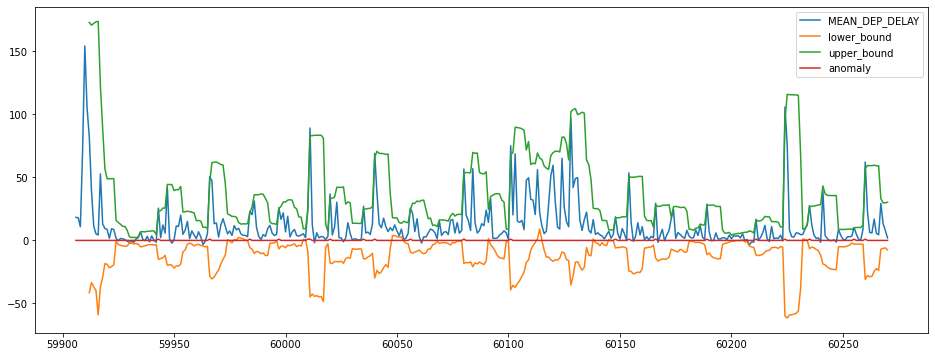

In [15]:
data["anomaly"] = data.apply(lambda row: 1 if (row['MEAN_DEP_DELAY']>=row["upper_bound"]) else 0, axis=1)
data.plot()

In [16]:
data[data["anomaly"]>0].count()

ORIGIN            21
FL_DATE           21
MEAN_DEP_DELAY    21
lower_bound       21
upper_bound       21
anomaly           21
dtype: int64

In [51]:
print("Total detected anomalies: {}".format(data[data["anomaly"]>0].shape[0])) 
data[data["anomaly"]>0].head(50)

Total detected anomalies: 21


,ORIGIN,FL_DATE,MEAN_DEP_DELAY,lower_bound,upper_bound,anomaly
59943,JFK,2018-02-07,25.621324,-15.024108,23.521515,1
59966,JFK,2018-03-02,50.654255,-28.336556,46.378795,1
59984,JFK,2018-03-20,23.017647,-5.848046,22.159134,1
59997,JFK,2018-04-02,25.961877,-6.691756,25.263250,1
60010,JFK,2018-04-15,25.182336,-8.480146,23.642514,1
60011,JFK,2018-04-16,89.207273,-44.823893,82.968198,1
60020,JFK,2018-04-25,36.850318,-18.002455,33.628996,1
60035,JFK,2018-05-10,27.109589,-14.567756,24.862212,1
60040,JFK,2018-05-15,68.961290,-29.781563,66.115614,1
60056,JFK,2018-05-31,25.670270,-9.242550,24.639274,1
